## Machine Learning Project 03

### Credit Card Fraud Detection

#### Importing Libraries

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

#### Reading the dataset

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()
df.info()

#### Exploratory Data Analysis

In [ ]:
df.isnull().sum()

#### Distribution of the Lagit Transactions

In [ ]:
df['Class'].value_counts()

In [ ]:
valid=df[df['Class']==0]
fraud=df[df['Class']==1]
print(valid.shape)
print(fraud.shape)

In [ ]:
valid.Amount.describe()

In [ ]:
fraud.Amount.describe()

#### Comparing the Amount of Fraudulent and Non-Fraudulent Transactions

In [ ]:
df.groupby('Class').mean()

#### Sampling the Data

In [12]:
valid_sample=valid.sample(n=492)

#### Concatinating the Sampled Data

In [ ]:
new_dataset=pd.concat([valid_sample,fraud],axis=0)
new_dataset.head()

In [ ]:
new_dataset['Class'].value_counts()

In [ ]:
new_dataset.groupby('Class').mean()

#### Splitting the Data into Features and Labels

In [ ]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']
print(X)
print(Y)

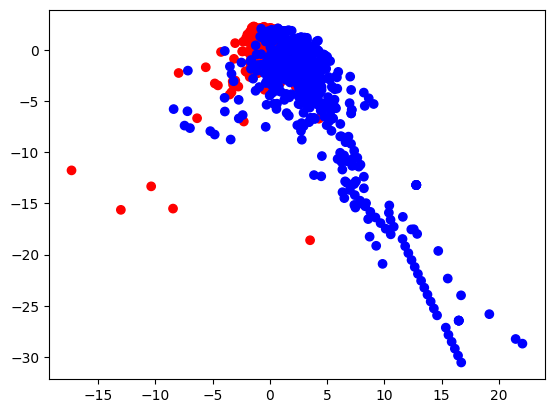

In [23]:
import matplotlib
import matplotlib.pyplot as plt
colors=['red','orange','blue']
plt.scatter(new_dataset['V2'],new_dataset['V1'],c=new_dataset['Class'],cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

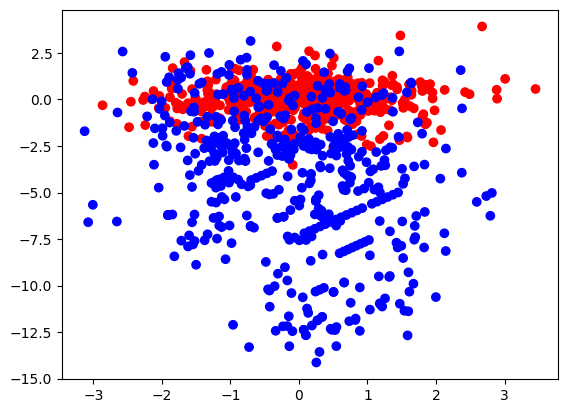

In [24]:
plt.scatter(new_dataset['V13'],new_dataset['V16'],c=new_dataset['Class'],cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

#### Histograms of some Features

<Axes: >

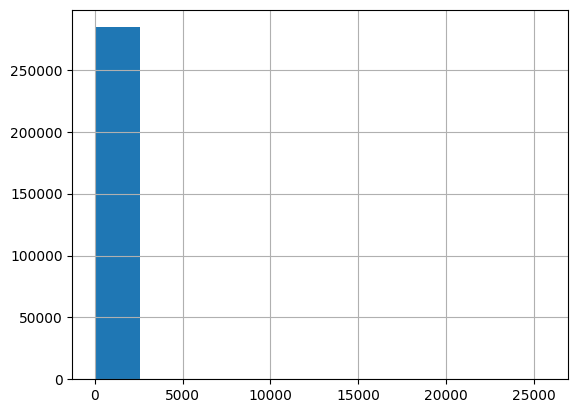

In [30]:
df['Amount'].hist()

<Axes: >

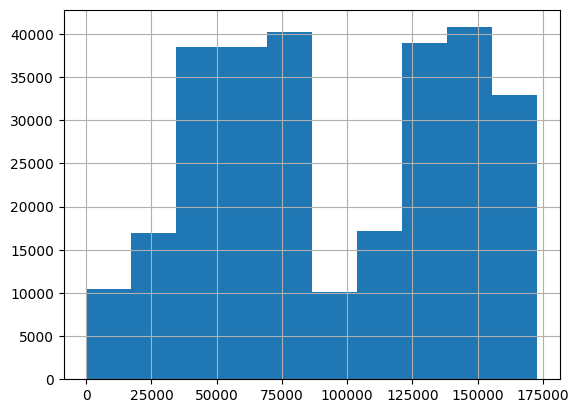

In [31]:
df['Time'].hist()

#### Splitting the Data into Training and Testing Sets

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


#### Model Training

In [34]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

#### Model Evaluation

##### Accuracy Score of Training and Testing Sets

In [39]:
X_train_prediction = model.predict(X_train)
Y_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print(('Accuracy of training data : ', Y_train_accuracy*100))

('Accuracy on training data : ', 93.90088945362135)


In [40]:
X_test_prediction = model.predict(X_test)
Y_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print(('Accuracy of test data : ', Y_test_accuracy*100))

('Accuracy of test data : ', 94.41624365482234)
